### Loading the Dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
df = pd.read_csv(r'C:\Users\DELL\Documents\TDI Folder\TDI_Projects\machine learning\week1\crop_yield_dataset.csv')

In [4]:
df.head()

,crop_yield_success,region,temperature_celsius,weather_condition,rainfall_mm,days_to_harvest,crop_type,irrigation_used,soil_type,fertilizer_used,crop_yield
0,1,0,27.676966,0,897.077239,122,0,0,0,0,6.555816
1,1,1,18.026142,1,992.673282,140,1,0,1,1,8.527341
2,1,2,29.794042,2,147.998025,106,2,1,2,0,1.127443
3,1,2,16.644190,1,986.866331,146,3,0,0,0,6.517573
4,1,1,31.620687,0,730.379174,110,4,0,3,1,7.248251


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   crop_yield_success   1000000 non-null  int64  
 1   region               1000000 non-null  int64  
 2   temperature_celsius  1000000 non-null  float64
 3   weather_condition    1000000 non-null  int64  
 4   rainfall_mm          1000000 non-null  float64
 5   days_to_harvest      1000000 non-null  int64  
 6   crop_type            1000000 non-null  int64  
 7   irrigation_used      1000000 non-null  int64  
 8   soil_type            1000000 non-null  int64  
 9   fertilizer_used      1000000 non-null  int64  
 10  crop_yield           1000000 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 83.9 MB


In [6]:
df.describe()

,crop_yield_success,region,temperature_celsius,weather_condition,rainfall_mm,days_to_harvest,crop_type,irrigation_used,soil_type,fertilizer_used,crop_yield
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000
mean,0.999769,1.499497,27.504965,1.001141,549.981901,104.495025,2.500205,0.500509,2.498985,0.49994,4.649472
std,0.015197,1.117831,7.220608,0.816357,259.851320,25.953412,1.708036,0.500000,1.708409,0.50000,1.696572
min,0.000000,0.000000,15.000034,0.000000,100.000896,60.000000,0.000000,0.000000,0.000000,0.00000,-1.147613
25%,1.000000,0.000000,21.254502,0.000000,324.891090,82.000000,1.000000,0.000000,1.000000,0.00000,3.417637
50%,1.000000,1.000000,27.507365,1.000000,550.124061,104.000000,2.000000,1.000000,2.000000,0.00000,4.651808
75%,1.000000,2.000000,33.753267,2.000000,774.738520,127.000000,4.000000,1.000000,4.000000,1.00000,5.879200
max,1.000000,3.000000,39.999997,2.000000,999.998098,149.000000,5.000000,1.000000,5.000000,1.00000,9.963372


In [9]:
x = df.drop('crop_yield',axis =1).values
y = df['crop_yield'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x.shape)

print(y.shape)

(1000000, 10)
(1000000,)


In [12]:
model = LinearRegression()
model.fit(x_train,y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

y_pred = model.predict(x_test)
y_pred

Coefficients:  [ 1.32407588e+00  5.50317395e-04  1.99483701e-02  7.62420568e-04
  4.99417420e-03  3.88670864e-05 -8.67646577e-04 -1.19937850e+00
 -1.76153843e-04  1.50075962e+00]
Intercept:  -0.12238778615622437


array([3.04395972, 4.79184771, 6.91926475, ..., 5.52583901, 4.6254497 ,
       3.79882493])

In [15]:
model.score(x_test, y_test)

0.9128649720172094

0.25038668698538663
R-squared:  0.9128649720172094


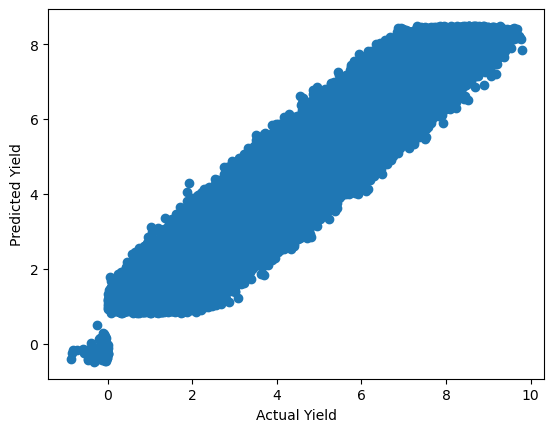

In [17]:
r_srq=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print(mse)
print('R-squared: ', r_srq)

plt.scatter(y_test, y_pred) 
plt.xlabel('Actual Yield')  
plt.ylabel('Predicted Yield')
plt.show()